<a href="https://colab.research.google.com/github/subhrajyotidasgupta/barc_projects/blob/master/line_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
import os
%matplotlib inline

[[[101 152 178]
  [100 151 177]
  [100 151 177]
  ...
  [100 154 179]
  [ 95 151 176]
  [ 95 151 176]]

 [[ 97 148 174]
  [ 98 149 175]
  [100 151 177]
  ...
  [100 154 179]
  [ 94 150 175]
  [ 95 151 176]]

 [[ 94 145 171]
  [ 96 147 173]
  [ 98 149 175]
  ...
  [ 99 153 178]
  [ 94 150 175]
  [ 94 150 175]]

 ...

 [[ 88 141 168]
  [ 88 141 168]
  [ 89 142 169]
  ...
  [ 92 146 169]
  [ 91 145 168]
  [ 97 151 174]]

 [[ 87 140 167]
  [ 87 140 167]
  [ 87 140 167]
  ...
  [ 96 150 173]
  [ 95 149 172]
  [ 93 147 170]]

 [[ 90 143 170]
  [ 89 142 169]
  [ 89 142 169]
  ...
  [ 96 150 173]
  [ 95 149 172]
  [ 92 146 169]]]


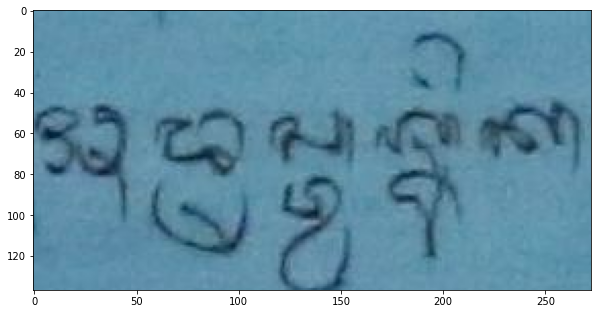

In [164]:
filename = './n.jpg'

# Load in Grayscale
img = cv2.imread(filename)
#img = img[720:2780, 100:3000]

# The underlying representation is a numpy array!
print(img)
try:
    plt.figure(figsize=(10,10))
    plt.imshow(img)
    plt.show()
except:
    pass

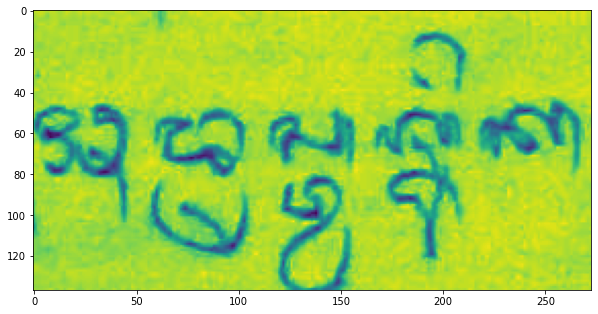

In [165]:
#import image
#image = cv2.imread('a01-000u.png')
#cv2.imshow('orig',image)
#cv2.waitKey(0)

#grayscale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10,10))
plt.imshow(gray)

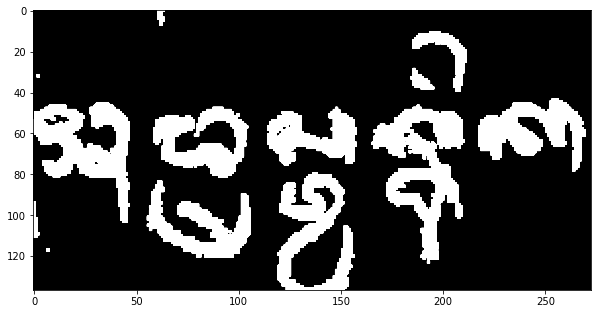

In [166]:
#binary
ret,thresh = cv2.threshold(gray,130,220,cv2.THRESH_BINARY_INV)
plt.figure(figsize=(10,10))
plt.imshow(thresh, cmap='gray', vmax=1, vmin=0)

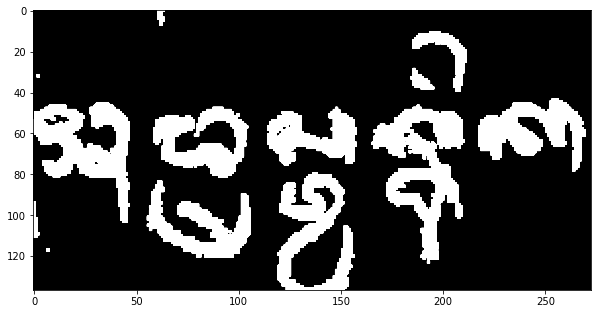

In [167]:
#dilation
kernel = np.ones((1,1), np.uint8)
img_dilation = cv2.dilate(thresh, kernel, iterations=1)
plt.figure(figsize=(10,10))
plt.imshow(img_dilation, cmap='gray', vmax=1, vmin=0)

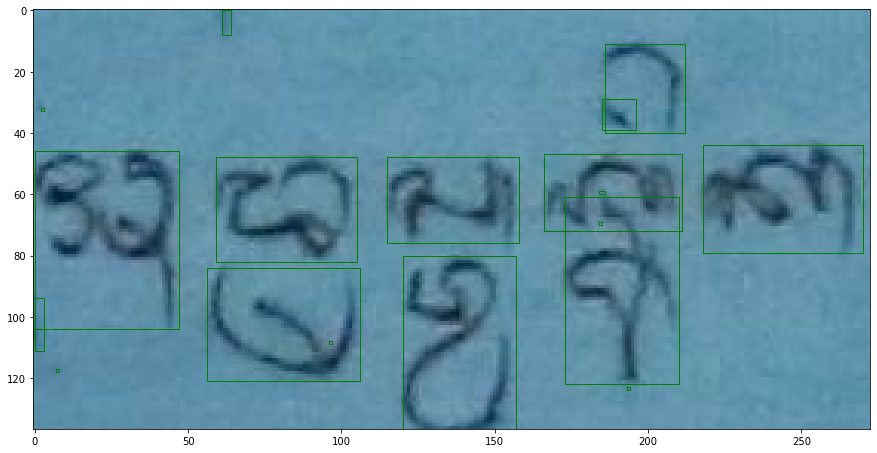

In [168]:
#find contours
ctrs, hier = cv2.findContours(img_dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#sort contours
sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])

plt.figure(figsize=(15,15))
current_axis = plt.gca()

lst = []

for i, ctr in enumerate(sorted_ctrs):
    sub_list = []
    # Get bounding box
    x, y, w, h = cv2.boundingRect(ctr)
    sub_list.append(y)
    sub_list.append(x)
    sub_list.append(w)
    sub_list.append(h)
    
    # Getting ROI
    #roi = img[y:y+h, x:x+w]
    
    lst.append(sub_list)
    
    # show ROI
    #plt.imshow(roi)
    current_axis.add_patch(Rectangle((x, y), w, h, edgecolor = 'g', fill=False, linewidth=1))
    
    #crop_img = roi
#     cv2.rectangle(img,(x,y),( x + w, y + h ),(90,0,255),2)
#     cv2.waitKey(0)


#print(img.shape)
plt.imshow(img)
#cv2.waitKey(0)
plt.show()

In [170]:
lst.sort()
filename = 'hello'
os.mkdir(filename)

for i in range(len(lst)):
    print("i" + str(i))
    cv2.imwrite(filename[:-4] + '/' + filename[:-4] + '-'+ str(i) + '.jpg', 
                  img[lst[i][0]: lst[i][0] + lst[i][3], lst[i][1]: lst[i][1] + lst[i][2]])

i0
i1
i2
i3
i4
i5
i6
i7
i8
i9
i10
i11
i12
i13
i14
i15
i16
i17


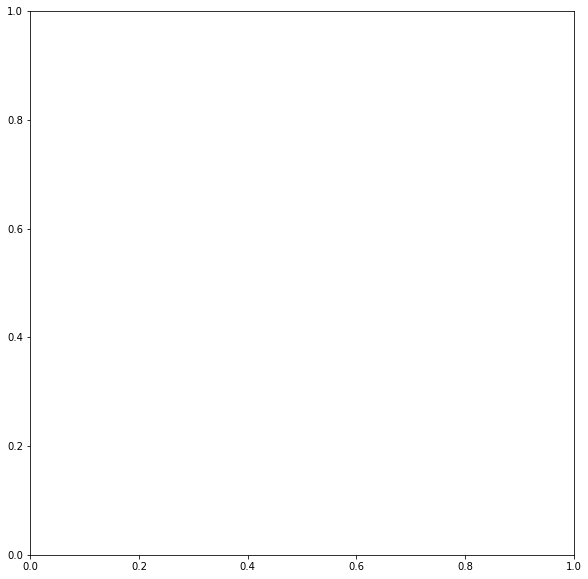

In [63]:
#ROUGH

roi = img[750:2750, 100:3000]

# show ROI

plt.figure(figsize=(10,10))
plt.imshow(roi)